In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv("brain_stroke.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [5]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df['age'] = df['age'].apply(lambda x : int(x))

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

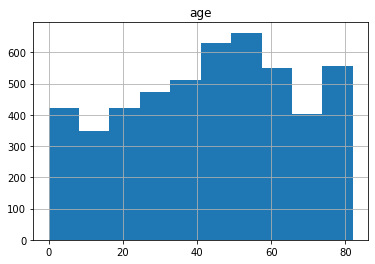

In [9]:
df.hist(column='age')

array([[<AxesSubplot:title={'center':'hypertension'}>]], dtype=object)

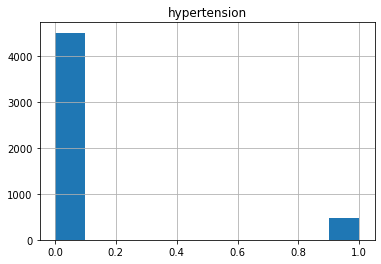

In [10]:
df.hist(column='hypertension')

array([[<AxesSubplot:title={'center':'heart_disease'}>]], dtype=object)

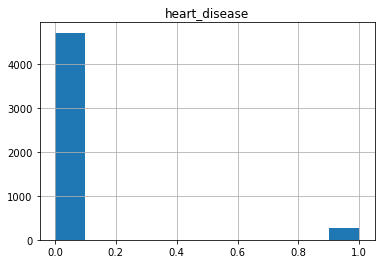

In [11]:
df.hist(column='heart_disease')

array([[<AxesSubplot:title={'center':'avg_glucose_level'}>]], dtype=object)

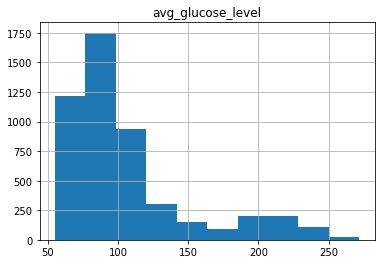

In [12]:
df.hist(column='avg_glucose_level')

array([[<AxesSubplot:title={'center':'stroke'}>]], dtype=object)

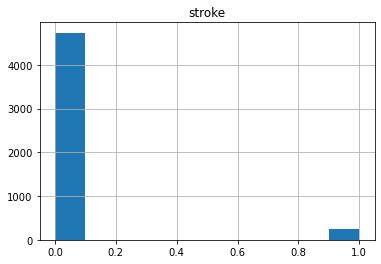

In [13]:
df.hist(column='stroke')

array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

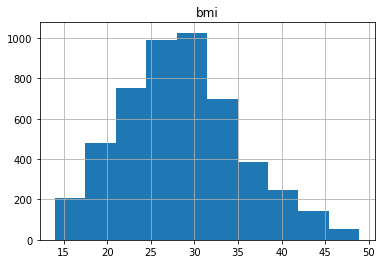

In [14]:
df.hist(column='bmi')

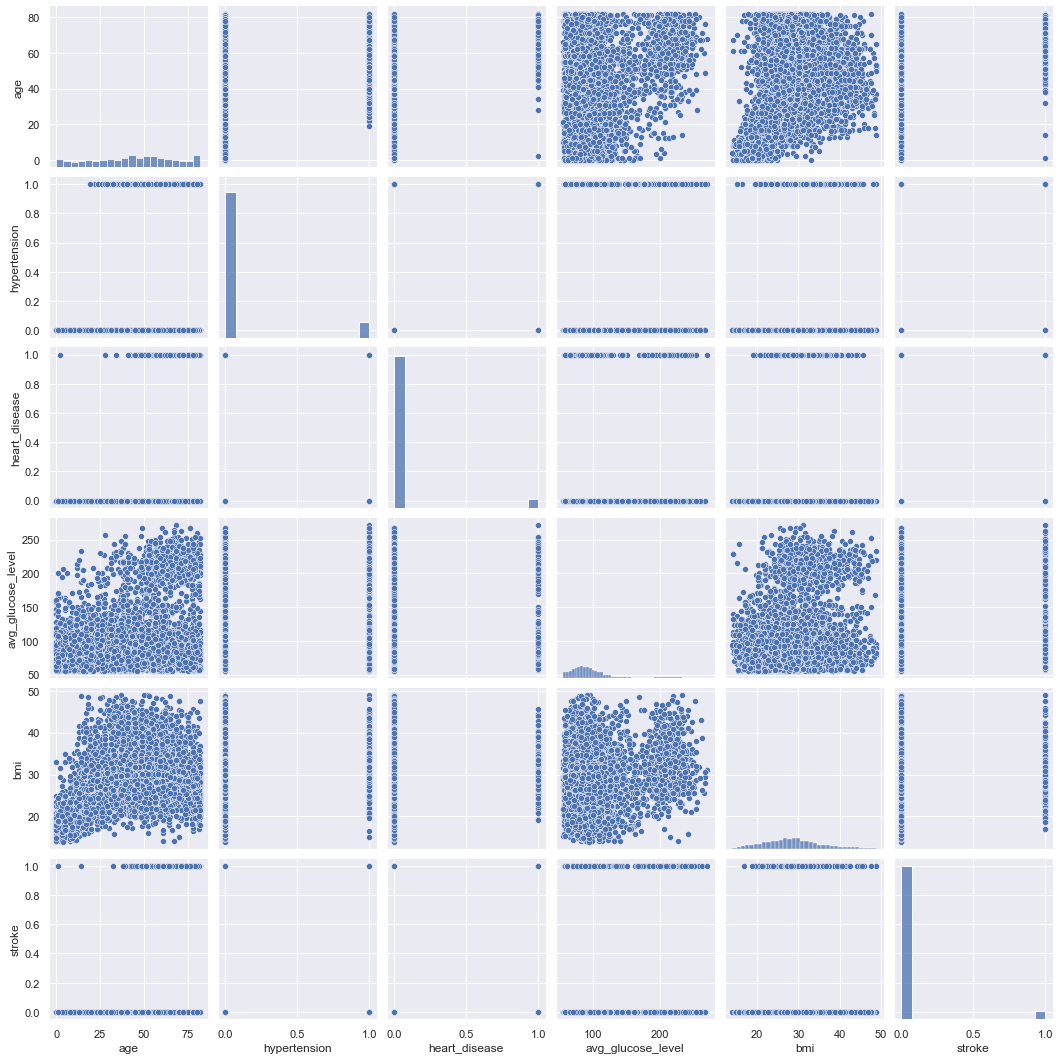

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(data=df)

In [16]:
x = 0
y = 0
for i in df.stroke:
    if i == 1:
        x = x+i
    else:
        y = y+1
print(x)
print(y)

248
4733


In [17]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [18]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [19]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [20]:
df.groupby('work_type')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
work_type,,,,,,,,
Govt_job,644.0,50.880435,15.450709,14.0,40.0,51.0,62.00,82.0
Private,2860.0,45.586364,18.563991,8.0,30.0,45.0,60.00,82.0
Self-employed,804.0,60.300995,16.905759,7.0,49.0,63.0,75.25,82.0
children,673.0,6.823180,4.644178,0.0,3.0,7.0,11.00,16.0


In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [22]:
df1 = df.copy()

In [23]:
df1['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df1['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [25]:
df1['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [26]:
df1['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
df1['smoking_status_new'] = oe.fit_transform(df1.smoking_status)

In [28]:
df1 = df1.drop(['smoking_status'],axis =1)
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_new
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,1,2
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,1,3
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1,2
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,1,1


In [29]:
df_dummies = pd.get_dummies(df1[['gender','ever_married','work_type','Residence_type']])
df_dummies.head(5)

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,1,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0,1,0
4,0,1,0,1,0,1,0,0,0,1


In [30]:
df2 = pd.concat([df1,df_dummies],axis = 1)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,...,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1,...,0,1,0,1,0,1,0,0,0,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,1,...,0,1,0,1,0,1,0,0,1,0
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,1,...,1,0,0,1,0,1,0,0,0,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1,...,1,0,0,1,0,0,1,0,1,0
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41,0,0,No,Private,Rural,70.15,29.8,0,...,0,1,1,0,0,1,0,0,1,0
4977,Male,40,0,0,Yes,Private,Urban,191.15,31.1,0,...,0,1,0,1,0,1,0,0,0,1
4978,Female,45,1,0,Yes,Govt_job,Rural,95.02,31.8,0,...,1,0,0,1,1,0,0,0,1,0
4979,Male,40,0,0,Yes,Private,Rural,83.94,30.0,0,...,0,1,0,1,0,1,0,0,1,0


In [31]:
df3 = df2.drop(['gender','ever_married','work_type','Residence_type'],axis = 1)
df3.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_new,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67,0,1,228.69,36.6,1,1,0,1,0,1,0,1,0,0,0,1
1,80,0,1,105.92,32.5,1,2,0,1,0,1,0,1,0,0,1,0
2,49,0,0,171.23,34.4,1,3,1,0,0,1,0,1,0,0,0,1
3,79,1,0,174.12,24.0,1,2,1,0,0,1,0,0,1,0,1,0
4,81,0,0,186.21,29.0,1,1,0,1,0,1,0,1,0,0,0,1


In [32]:
df3.dtypes

age                          int64
hypertension                 int64
heart_disease                int64
avg_glucose_level          float64
bmi                        float64
stroke                       int64
smoking_status_new           int32
gender_Female                uint8
gender_Male                  uint8
ever_married_No              uint8
ever_married_Yes             uint8
work_type_Govt_job           uint8
work_type_Private            uint8
work_type_Self-employed      uint8
work_type_children           uint8
Residence_type_Rural         uint8
Residence_type_Urban         uint8
dtype: object

In [33]:
df3 = df3[['stroke','age','avg_glucose_level','bmi','hypertension','heart_disease','smoking_status_new','gender_Female','gender_Male',
          'ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Private','work_type_Self-employed','work_type_children',
           'Residence_type_Rural','Residence_type_Urban']]

In [34]:
x = 0
y = 0
for i in df3.stroke:
    if i == 1:
        x = x+i
    else:
        y = y+1
print('Stroke',x)
print('Not Stroke',y)

Stroke 248
Not Stroke 4733


In [35]:
x = df3.drop(['stroke'],axis = 1)
x.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,smoking_status_new,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67,228.69,36.6,0,1,1,0,1,0,1,0,1,0,0,0,1
1,80,105.92,32.5,0,1,2,0,1,0,1,0,1,0,0,1,0
2,49,171.23,34.4,0,0,3,1,0,0,1,0,1,0,0,0,1
3,79,174.12,24.0,1,0,2,1,0,0,1,0,0,1,0,1,0
4,81,186.21,29.0,0,0,1,0,1,0,1,0,1,0,0,0,1


In [36]:
y = df3[['stroke']]
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
4976,0
4977,0
4978,0
4979,0


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [39]:
y_sm = y_sm['stroke']
y_sm

0       1
1       1
2       1
3       1
4       1
       ..
9461    1
9462    1
9463    1
9464    1
9465    1
Name: stroke, Length: 9466, dtype: int64

In [40]:
y_sm.count()

9466

In [41]:
y_sm[y_sm>=1].count()

4733

In [42]:
y_sm[y_sm<=0].count()

4733

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, train_size=.20, random_state=10)

In [44]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression(max_iter=3000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

In [45]:
model.score(x_test,y_test)

0.9305427175491879

In [46]:
prediction = model.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
cm


array([[3632,  156],
       [ 370, 3415]], dtype=int64)

In [48]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
grid_search = GridSearchCV(LogisticRegression(max_iter=3000),param_grid, cv = 5)
grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [49]:
print("Tuned Logistic Regression Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(grid_search.best_score_))

Tuned Logistic Regression Parameters: {'C': 11787686.347935867}
Best score is 0.9370140950686878


In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8979268453717153

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.9326554865971214

In [52]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
svc_model.score(x_test,y_test)

0.7516175888023241

In [53]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(),x_sm,y_sm)
print(score)
print("Avg :",np.average(score))

[0.88859556 0.99260433 0.98520866 0.98679345 0.98256735]
Avg : 0.9671538726291662


In [54]:
from sklearn.model_selection import cross_val_score
lr_score = cross_val_score(LogisticRegression(max_iter=3000),x_sm,y_sm)
print(lr_score)
print("Avg :",np.average(lr_score))

[0.8500528  0.9582673  0.9540412  0.95668251 0.94558901]
Avg : 0.932926566001235


In [55]:
import pickle
with open('brain_stroke_prediction.pickle','wb')as f:
    pickle.dump(classifier,f)